In [45]:
import numpy as np
import torch
from torch import nn
import seaborn as sb
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
tip_df = sb.load_dataset('tips')

In [3]:
tip_df_data = tip_df[['total_bill', 'size', 'tip']][:30]

In [4]:
tip_df_data.sort_values(by=["total_bill"], inplace=True)

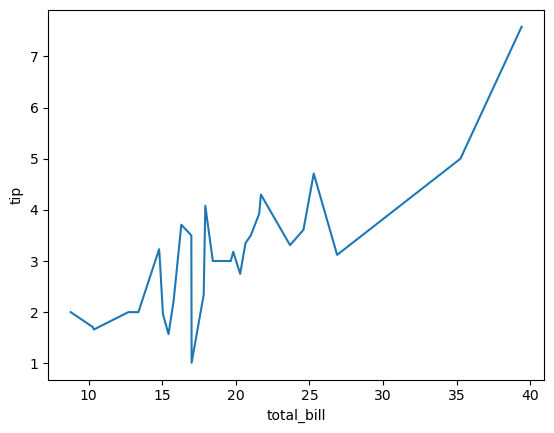

In [5]:
plt.plot(tip_df_data['total_bill'], tip_df_data['tip'])
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()

In [6]:
ANNreg = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1)
)

In [7]:
sum(prms.numel() for prms in ANNreg.parameters())

4

In [8]:
lr = .05
loss_fn = nn.MSELoss()
optmzr = torch.optim.SGD(ANNreg.parameters(), lr=lr)

In [9]:
epochs = 100
losses = torch.zeros(epochs, requires_grad=False)

x = torch.tensor(tip_df_data[['total_bill']].values, dtype=torch.float32)
y = torch.tensor(tip_df_data[['tip']].values, dtype=torch.float32)

for epoch_i in range(epochs):

    y_hat = ANNreg(x)

    loss = loss_fn(y_hat, y)
    losses[epoch_i] = loss

    optmzr.zero_grad()
    loss.backward()
    optmzr.step()

In [10]:
pred = ANNreg(x)

In [11]:
test_loss = ((pred - y) ** 2).mean()

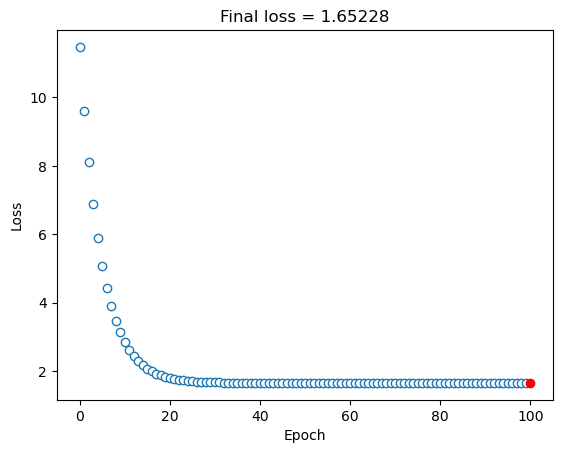

In [12]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %test_loss.item())
plt.show()